In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  matplotlib.font_manager as fm
plt.rcParams['font.sans-serif']=['黑体']
plt.rcParams['axes.unicode_minus']=False
myfont=fm.FontProperties(fname="C:\Windows\Fonts\黑体.TTF")


data=pd.read_csv('../data/test.csv',header=None)

data.columns=[['title','region','street','maininfo','subinfo','area','built_time','total_price','price']]

data.head(3)



,title,region,street,maininfo,subinfo,area,built_time,total_price,price
0,保利观澜悦城,江北,海尔路,1室1厅,低楼层/共33层,57.13平米,2018年建/塔楼,100.0,17504
1,金科十年城北区,江北,石马河,2室1厅,高楼层/共34层,75.96平米,2013年建/塔楼,125.0,16457
2,珠江国际,江北,北滨路,2室1厅,低楼层/共42层,75.03平米,2013年建/塔楼,148.0,19726


In [2]:
import matplotlib
print(matplotlib.matplotlib_fname())

e:\program files\python37\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 9 columns):
(title,)          2998 non-null object
(region,)         2998 non-null object
(street,)         2998 non-null object
(maininfo,)       2998 non-null object
(subinfo,)        2998 non-null object
(area,)           2998 non-null object
(built_time,)     2998 non-null object
(total_price,)    2998 non-null float64
(price,)          2998 non-null int64
dtypes: float64(1), int64(1), object(7)
memory usage: 210.9+ KB


In [4]:
data.describe()


,total_price,price
count,2998.00000,2998.000000
mean,112.60464,13150.120414
std,45.87582,3179.483765
min,7.80000,1553.000000
25%,82.00000,11089.250000
50%,107.00000,13037.500000
75%,135.00000,15085.250000
max,475.00000,27431.000000


In [5]:
def data_ad(select_data,str):
    if str in select_data:
       return float(select_data[0:select_data.find(str)])
    

data_area=data[data.columns[-4]].apply(data_ad,str='平米')
data_area

0        57.13
1        75.96
2        75.03
3        57.42
4        37.33
         ...  
2993    122.76
2994     33.25
2995     40.53
2996     94.00
2997    115.56
Name: (area,), Length: 2998, dtype: float64

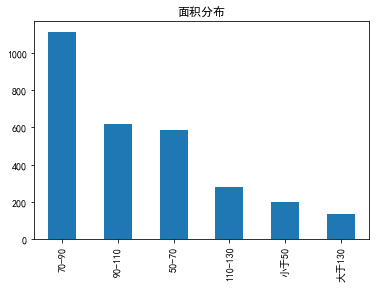

In [6]:
data_area.value_counts()

area_level=[0,50,70,90,110,130,150]
label_level=['小于50','50-70','70-90','90-110','110-130','大于130']
area_cut=pd.cut(data_area,bins=area_level,labels=label_level)
area_cut.value_counts().plot(kind='bar',title='面积分布')
plt.show()

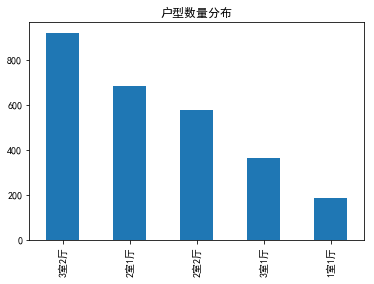

In [7]:
data_maininfo=data[data.columns[3]]
data_maininfo=data_maininfo.value_counts()
data_maininfo.head(5).plot(kind='bar',title='户型数量分布')
plt.show()

In [8]:
def data_ad1(select_data,str):
    if str in select_data:
       return (select_data[0:select_data.find(str)])
    

data_subinfo=data[data.columns[4]].apply(data_ad1,str='/')
data_subinfo.value_counts()

中楼层     1153
高楼层      987
低楼层      852
地下室        4
下叠别墅       2
Name: (subinfo,), dtype: int64

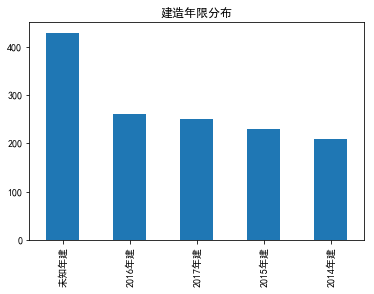

In [9]:
data_built_time=data[data.columns[-3]].apply(data_ad1,str='/')
data_built_time.value_counts()
data_built_time.value_counts().head(5).plot(kind='bar',title='建造年限分布')

In [10]:
df=data[data.columns[-2:]]
df['area']=data_area
df['region']=data[data.columns[1]]
df['subinfo']=data_subinfo
df['built_time']=data_built_time
df

e:\program files\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
e:\program files\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
e:\program files\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

,total_price,price,area,region,subinfo,built_time
0,100.0,17504,57.13,江北,低楼层,2018年建
1,125.0,16457,75.96,江北,高楼层,2013年建
2,148.0,19726,75.03,江北,低楼层,2013年建
3,95.0,16545,57.42,南岸,高楼层,2018年建
4,60.0,16073,37.33,渝中,中楼层,2016年建
...,...,...,...,...,...,...
2993,146.0,11894,122.76,沙坪坝,高楼层,未知年建
2994,59.0,17745,33.25,沙坪坝,中楼层,2007年建
2995,66.0,16285,40.53,江北,高楼层,2016年建
2996,106.0,11277,94.00,南岸,低楼层,2005年建


In [11]:
df1=df.pivot_table(index=[df.columns[3]], values=[df.columns[1]])
df1=df1.sort_values(by=df.columns[1],ascending=False)
df1

,price
"(region,)",
江北,15128.182716
渝中,14654.468085
渝北,14212.273284
南岸,13489.139676
九龙坡,12704.648562
沙坪坝,12030.780928
大渡口,11823.042857
巴南,10604.985366
北碚,9376.164706


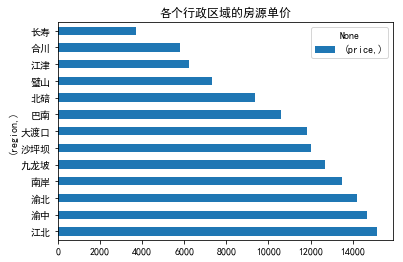

In [12]:
df1.plot(kind='barh',title='各个行政区域的房源单价')

In [13]:
df2=df.pivot_table(index=[df.columns[4]], values=[df.columns[1]])
df2=df2.sort_values(by=df.columns[1],ascending=False)
df2

,price
"(subinfo,)",
地下室,14347.000000
高楼层,13241.825735
低楼层,13157.157277
中楼层,13064.095403
下叠别墅,12095.500000


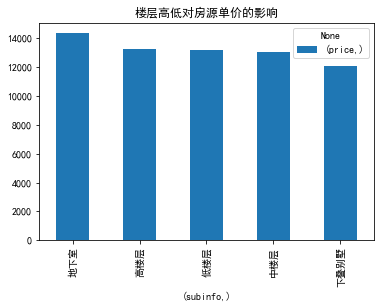

In [14]:
df2.plot(kind='bar',title='楼层高低对房源单价的影响')

In [15]:
df3=df.pivot_table(index=[df.columns[5]], values=[df.columns[1]])
df3=df3.sort_values(by=df.columns[1],ascending=False)
df3

,price
"(built_time,)",
2019年建,15990.833333
2017年建,14624.228000
2016年建,14407.509579
2018年建,14294.140000
2015年建,13934.952174
2010年建,13887.680851
2012年建,13836.625000
2011年建,13769.750000
2014年建,13560.354067


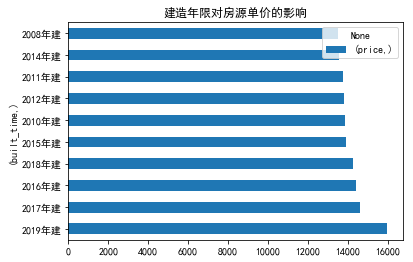

In [16]:
df3.head(10).plot(kind='barh',title='建造年限对房源单价的影响')

决策树分析相关性

In [17]:
df

,total_price,price,area,region,subinfo,built_time
0,100.0,17504,57.13,江北,低楼层,2018年建
1,125.0,16457,75.96,江北,高楼层,2013年建
2,148.0,19726,75.03,江北,低楼层,2013年建
3,95.0,16545,57.42,南岸,高楼层,2018年建
4,60.0,16073,37.33,渝中,中楼层,2016年建
...,...,...,...,...,...,...
2993,146.0,11894,122.76,沙坪坝,高楼层,未知年建
2994,59.0,17745,33.25,沙坪坝,中楼层,2007年建
2995,66.0,16285,40.53,江北,高楼层,2016年建
2996,106.0,11277,94.00,南岸,低楼层,2005年建


In [18]:
import sklearn.preprocessing as sp
import numpy as np

r= np.array(df[df.columns[2]])

area_level=[0,50,70,90,110,130]
label_level=['50','50-70','70-90','90-110','110-130']
area_cut=pd.cut(r,bins=area_level,labels=label_level)
area_cut_str=np.array(area_cut).astype(np.str_)
area_cut_str
lbe = sp.LabelEncoder()
lbe_sam1 = lbe.fit_transform(area_cut_str)
print(lbe_sam1)


[2 3 3 ... 1 4 0]


In [19]:
df['area_1']=lbe_sam1
df

e:\program files\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,total_price,price,area,region,subinfo,built_time,area_1
0,100.0,17504,57.13,江北,低楼层,2018年建,2
1,125.0,16457,75.96,江北,高楼层,2013年建,3
2,148.0,19726,75.03,江北,低楼层,2013年建,3
3,95.0,16545,57.42,南岸,高楼层,2018年建,2
4,60.0,16073,37.33,渝中,中楼层,2016年建,1
...,...,...,...,...,...,...,...
2993,146.0,11894,122.76,沙坪坝,高楼层,未知年建,0
2994,59.0,17745,33.25,沙坪坝,中楼层,2007年建,1
2995,66.0,16285,40.53,江北,高楼层,2016年建,1
2996,106.0,11277,94.00,南岸,低楼层,2005年建,4


In [20]:
r1= np.array(df[df.columns[3]])
region_str=r1.astype(np.str_)
lbe = sp.LabelEncoder()
lbe_sam2 = lbe.fit_transform(region_str)
df['region_1']=lbe_sam2
df

e:\program files\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,total_price,price,area,region,subinfo,built_time,area_1,region_1
0,100.0,17504,57.13,江北,低楼层,2018年建,2,6
1,125.0,16457,75.96,江北,高楼层,2013年建,3,6
2,148.0,19726,75.03,江北,低楼层,2013年建,3,6
3,95.0,16545,57.42,南岸,高楼层,2018年建,2,2
4,60.0,16073,37.33,渝中,中楼层,2016年建,1,9
...,...,...,...,...,...,...,...,...
2993,146.0,11894,122.76,沙坪坝,高楼层,未知年建,0,8
2994,59.0,17745,33.25,沙坪坝,中楼层,2007年建,1,8
2995,66.0,16285,40.53,江北,高楼层,2016年建,1,6
2996,106.0,11277,94.00,南岸,低楼层,2005年建,4,2


In [21]:
r3= np.array(df[df.columns[4]])
subinfo_str=r3.astype(np.str_)
lbe = sp.LabelEncoder()
lbe_sam3 = lbe.fit_transform(subinfo_str)
df['subinfo_1']=lbe_sam3
df

,total_price,price,area,region,subinfo,built_time,area_1,region_1,subinfo_1
0,100.0,17504,57.13,江北,低楼层,2018年建,2,6,2
1,125.0,16457,75.96,江北,高楼层,2013年建,3,6,4
2,148.0,19726,75.03,江北,低楼层,2013年建,3,6,2
3,95.0,16545,57.42,南岸,高楼层,2018年建,2,2,4
4,60.0,16073,37.33,渝中,中楼层,2016年建,1,9,1
...,...,...,...,...,...,...,...,...,...
2993,146.0,11894,122.76,沙坪坝,高楼层,未知年建,0,8,4
2994,59.0,17745,33.25,沙坪坝,中楼层,2007年建,1,8,1
2995,66.0,16285,40.53,江北,高楼层,2016年建,1,6,4
2996,106.0,11277,94.00,南岸,低楼层,2005年建,4,2,2


In [22]:
r4= np.array(df[df.columns[5]])
built_time_str=r4.astype(np.str_)
lbe = sp.LabelEncoder()
lbe_sam4 = lbe.fit_transform(built_time_str)
df['built_time_1']=lbe_sam4
df

,total_price,price,area,region,subinfo,built_time,area_1,region_1,subinfo_1,built_time_1
0,100.0,17504,57.13,江北,低楼层,2018年建,2,6,2,26
1,125.0,16457,75.96,江北,高楼层,2013年建,3,6,4,21
2,148.0,19726,75.03,江北,低楼层,2013年建,3,6,2,21
3,95.0,16545,57.42,南岸,高楼层,2018年建,2,2,4,26
4,60.0,16073,37.33,渝中,中楼层,2016年建,1,9,1,24
...,...,...,...,...,...,...,...,...,...,...
2993,146.0,11894,122.76,沙坪坝,高楼层,未知年建,0,8,4,28
2994,59.0,17745,33.25,沙坪坝,中楼层,2007年建,1,8,1,15
2995,66.0,16285,40.53,江北,高楼层,2016年建,1,6,4,24
2996,106.0,11277,94.00,南岸,低楼层,2005年建,4,2,2,13


In [23]:
# import pandas as pd
# writer = pd.ExcelWriter('my.xlsx')
# df.to_excel(writer,float_format='%.5f')
# writer.save()

In [24]:
import sklearn.tree as st
import sklearn.model_selection as ms
import sklearn.metrics as sm
x, y = df[df.columns[6:,]], df[df.columns[0]]
x.shape, y.shape
train_x, test_x, train_y, test_y = \
    ms.train_test_split(
        x, y, test_size=0.2, random_state=7)


0.6434269306961413


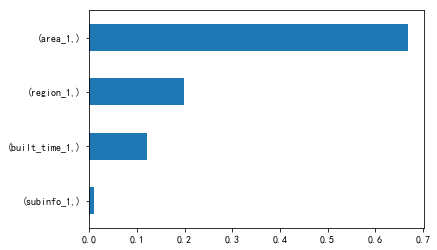

In [25]:
model = st.DecisionTreeRegressor(
    max_depth=10, min_samples_split=15)
tree=model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))
fi = model.feature_importances_
# 可视化特征重要性
feature_name=list(df.columns[6:,])
fi = pd.Series(fi, index=feature_name)
fi.sort_values().plot.barh()


In [26]:
import sklearn.linear_model as lm
params = np.arange(10, 1000, 100)
for param in params:
    model = lm.Ridge(param)
    model.fit(train_x, train_y)
    # 使用测试集测试并评估模型效果
    pred_test_y = model.predict(test_x)
    print(param,':', sm.r2_score(test_y, pred_test_y))
    

10 : 0.12785323120156622
110 : 0.12733589066481066
210 : 0.12675066227826048
310 : 0.1261083327753285
410 : 0.12541818380726888
510 : 0.1246882147853926
610 : 0.12392532973045667
710 : 0.12313549447578453
810 : 0.12232386935573214
910 : 0.12149492154695984


In [12]:
import sklearn.ensemble as se
import sklearn.tree as st

from sklearn.ensemble import GradientBoostingRegressor

model =se.GridientBoostingRegressor(
    max_depth=3, n_estimators=400, min_samples_split=2)
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))


AttributeError: module 'sklearn.ensemble' has no attribute 'GridientBoostingRegressor'

In [28]:
test_x=[[2,6,24,1],[2,9,24,1],[2,10,24,1]]
pred_test_y = model.predict(test_x)
pred_test_y

array([122.10530964, 126.76502459, 128.3182629 ])

In [29]:
import sklearn.tree as st
import sklearn.model_selection as ms
import sklearn.metrics as sm
a=df[df.columns[0]]
b=df[df.columns[7]]
c=df[df.columns[8]]
d=df[df.columns[9]]
e=df[df.columns[6]]
df2 = pd.DataFrame({
        'total_price': a,
        'region_2': b,
         'sub_2':c,
        'built_2':d,
        'area_2':e
})
df2

x, y = df2[df2.columns[0:4]],df2[df2.columns[4]]

x.shape, y.shape
train_x, test_x, train_y, test_y = \
    ms.train_test_split(
        x, y, test_size=0.2, random_state=7)
model = st.DecisionTreeRegressor(
    max_depth=4, min_samples_split=10)
tree=model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))



0.1665237897048072


In [30]:
# import sklearn.pipeline as pl
# import sklearn.preprocessing as sp
# model = pl.make_pipeline(
#     sp.PolynomialFeatures(5), lm.Ridge(1))
# model.fit(train_x, train_y)
# pred_test_y = model.predict(test_x)
# print(sm.r2_score(test_y, pred_test_y))

In [33]:
test_x=[[50,2,1,24],[65,2,1,24],[80,2,1,24]]
pred_test_y = model.predict(test_x)
pred_test_y

array([1.58181818, 1.58181818, 2.55305466])

In [32]:
df2

,total_price,region_2,sub_2,built_2,area_2
0,100.0,6,2,26,2
1,125.0,6,4,21,3
2,148.0,6,2,21,3
3,95.0,2,4,26,2
4,60.0,9,1,24,1
...,...,...,...,...,...
2993,146.0,8,4,28,0
2994,59.0,8,1,15,1
2995,66.0,6,4,24,1
2996,106.0,2,2,13,4
